# Part 1: Prepare the dataset

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [45]:
# Load the Zillow Home Value Index dataframe
file_path = r'D:\Github\Repos\-Core--Preparing-Time-Series-from-Wide-Form-Data\Data\City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'
df = pd.read_csv(file_path)


In [46]:
# Filter the DataFrame to include rows where 'SizeRank' is between 0 and 3 (inclusive)
regions_df = df[df['SizeRank'].between(0, 3, inclusive='both')]


In [47]:
# Display the first few rows of the filtered DataFrame
regions_df.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [48]:
# Display information about the DataFrame
regions_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 3
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 8.8+ KB


In [49]:
# Extract the first 8 columns as id_vars
id_vars = regions_df.columns[:8]
id_vars


Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'],
      dtype='object')

In [50]:
# Reshape the DataFrame into a long format using 'melt'
regions_long = pd.melt(regions_df, id_vars=id_vars, var_name='Date')
regions_long


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [51]:
# Access the 'Date' column of the DataFrame at index 2
regions_long['Date'][2]


'2000-01-31'

In [52]:
# Define the date format
fmt = '%Y-%m-%d'


In [53]:
# Convert the 'Date' column to datetime using the defined format
regions_long['Date'] = pd.to_datetime(regions_long['Date'], format=fmt)


In [54]:
# Display information about the DataFrame
regions_long.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   value       1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


In [55]:
# Set the 'Date' column as the DataFrame's index
regions_long = regions_long.set_index('Date')
regions_long


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [56]:
# Group the data by 'RegionName' and resample it to monthly frequency, taking the last value in each month
regions_ts = regions_long.groupby('RegionName').resample("M").last()['value']
regions_ts

RegionName  Date      
Chicago     2000-01-31    166139.0
            2000-02-29    166536.0
            2000-03-31    167368.0
            2000-04-30    168826.0
            2000-05-31    170499.0
                            ...   
New York    2022-05-31    768797.0
            2022-06-30    773944.0
            2022-07-31    777692.0
            2022-08-31    779960.0
            2022-09-30    781622.0
Name: value, Length: 1092, dtype: float64

# Part 2

In [57]:
# Create a copy of the long-format data
regions_unstacked = regions_long.copy()


In [58]:
# Unstack the time series data
regions_unstacked = regions_ts.unstack(0)
regions_unstacked


RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,166139.0,109068.0,234181.0,253690.0
2000-02-29,166536.0,109079.0,234401.0,255517.0
2000-03-31,167368.0,108878.0,235513.0,257207.0
2000-04-30,168826.0,108881.0,237589.0,260310.0
2000-05-31,170499.0,108834.0,240113.0,263204.0
...,...,...,...,...
2022-05-31,312487.0,265558.0,990391.0,768797.0
2022-06-30,314663.0,268901.0,992337.0,773944.0
2022-07-31,315910.0,271059.0,992630.0,777692.0


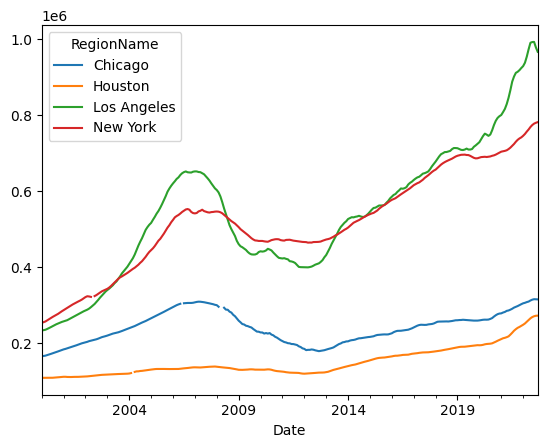

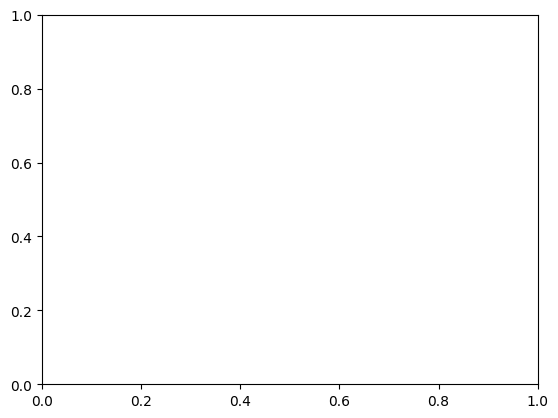

In [59]:
# Plot the unstacked data
regions_unstacked.plot();
fig, ax = plt.subplots()


In [60]:
# Plot formatting for y-axis labels
def thousands(x, pos):
    return f'{x/1000:.0f}K'
ax.yaxis.set_major_formatter(FuncFormatter(thousands))
ax.set_xlabel("Year")
ax.set_ylabel('Value')
# Add legend with region names
ax.legend(regions_unstacked.columns[0:])
plt.show()

In [61]:
# Extract data for the end of 2008
end_2008 = regions_unstacked.loc['2008-12-31']


In [62]:
# Find the region with the highest and lowest values at the end of 2008
highest_value_region = end_2008.idxmax()
lowest_value_region = end_2008.idxmin()
highest_value_region
lowest_value_region


'Houston'

In [63]:
# Calculate the difference between November and December 2008
regions_unstacked_diff = regions_unstacked.diff(4)
regions_unstacked_diff


RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN
2000-04-30,NaN,NaN,NaN,NaN
2000-05-31,4360.0,-234.0,5932.0,9514.0
...,...,...,...,...
2022-05-31,7383.0,16840.0,61400.0,23111.0
2022-06-30,8259.0,16821.0,54401.0,23366.0
2022-07-31,7607.0,14624.0,38756.0,20958.0


In [67]:
# Calculate the difference between consecutive months
regions_unstacked_diff = regions_unstacked.diff()

# Extract the difference for December 2008
difference_dec_2008 = regions_unstacked_diff.loc['2008-12-31']
difference_dec_2008

RegionName
Chicago        -5753.0
Houston         -964.0
Los Angeles   -12611.0
New York       -4458.0
Name: 2008-12-31 00:00:00, dtype: float64

<Axes: xlabel='Date'>

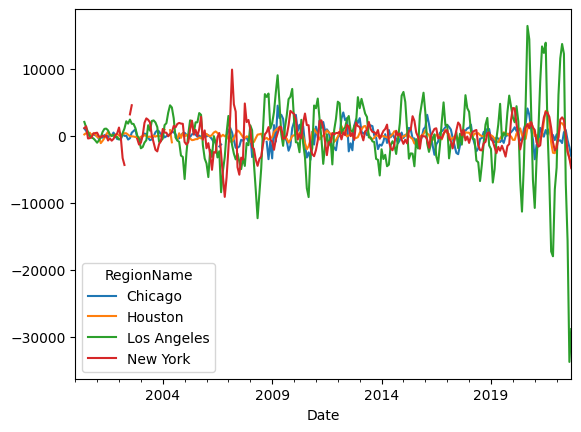

In [64]:
# Plot the differences between consecutive months
regions_unstacked_diff.diff().plot()

1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
2) How much did the home values change from November 2008 to December 2008 (in dollars)?

1) At the end of 2008:
- The city with the highest Typical Home Value appears to be Los Angeles.
- The city with the least Typical Home Value appears to be Chicago.

2) 
- Chicago: A decrease of $5,753
- Houston: A decrease of $964
- Los Angeles: A decrease of $12,611
- New York: A decrease of $4,458